## CS4440 Group project 4
This is the group project on the relation between Hypertension and Stroke.


In [115]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pathlib
import statistics

In [116]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report

In [117]:
path = pathlib.PurePath()
temp = os.path.join(path, 'datasets/diabetes_binary_5050split_health_indicators_BRFSS2015.csv')
temp2 = os.path.join(path, 'datasets/diabetes_prediction_dataset.csv')
temp3 = os.path.join(path, 'datasets/combined.csv')
df = pd.read_csv(temp)
df2 = pd.read_csv(temp2)
combined = pd.read_csv(temp3)
stroke = pd.read_csv('datasets/stroke_data.csv')
hypertension = pd.read_csv('datasets/hypertension_data.csv')

C:\Users\Garyc\AppData\Local\Temp\ipykernel_32028\2246725553.py:7: DtypeWarning: Columns (23,26) have mixed types. Specify dtype option on import or set low_memory=False.
  combined = pd.read_csv(temp3)


## Data Cleaning

In [118]:
stroke.isnull().sum()

sex                  3
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [119]:
hypertension.isnull().sum()

age          0
sex         25
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
target       0
dtype: int64

In [120]:
stroke = stroke.dropna()
hypertension = hypertension.dropna()

In [121]:
stroke.isnull().sum()

sex                  0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [122]:
hypertension.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [123]:
stroke.columns

Index(['sex', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [124]:
hypertension.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

<Axes: >

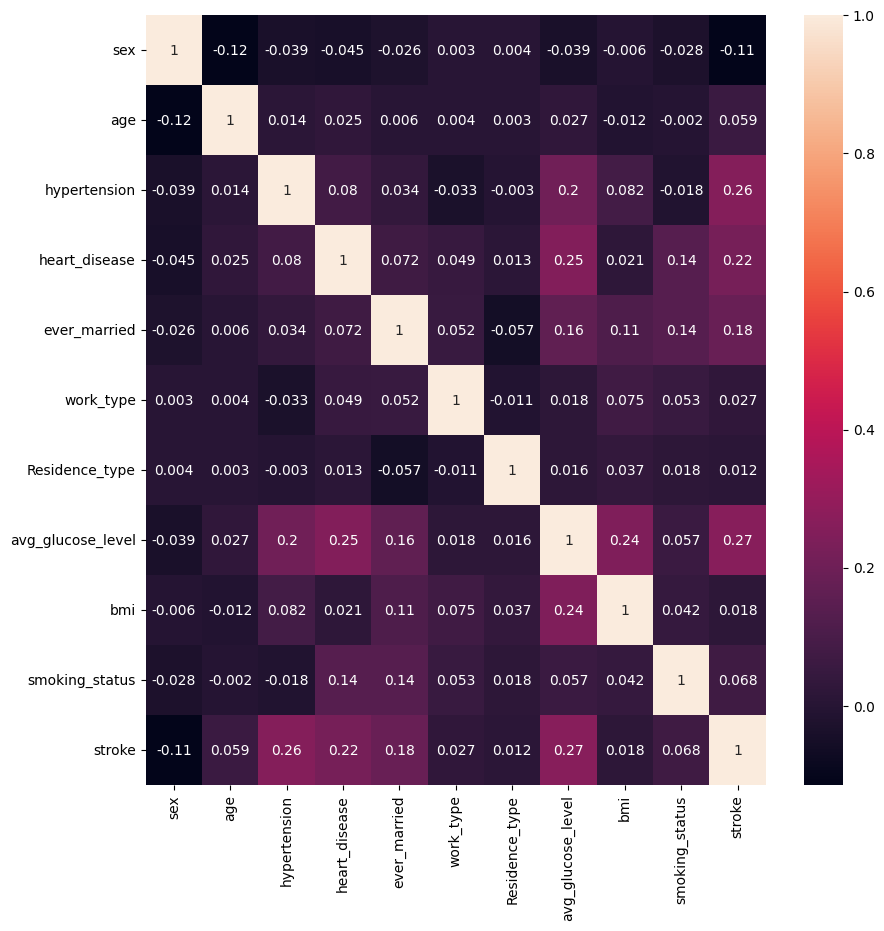

In [231]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(stroke.corr().round(3),annot=True, ax=ax)

<Axes: >

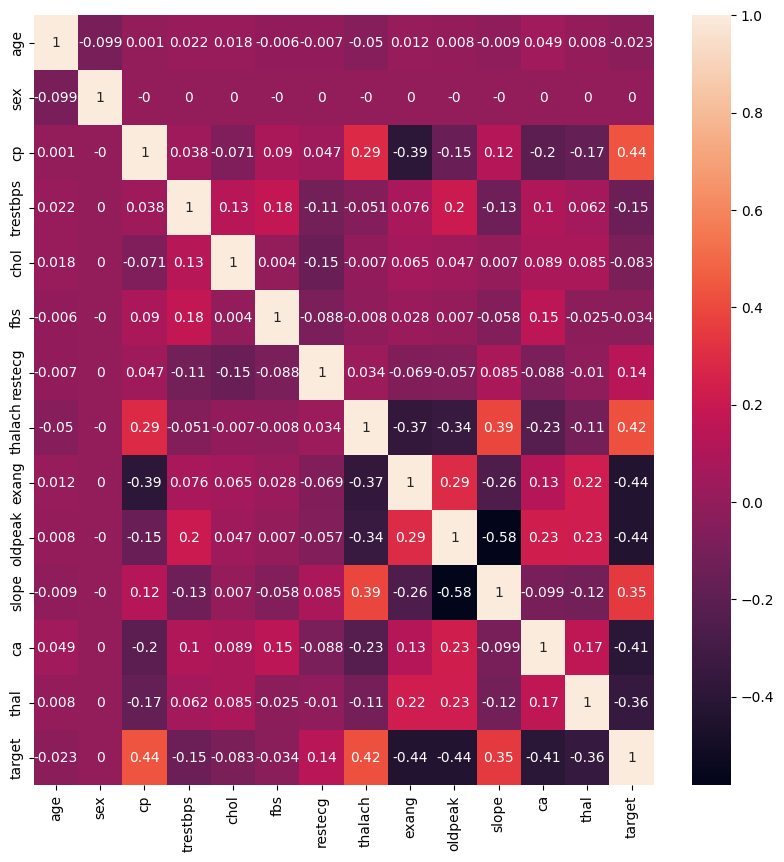

In [230]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(hypertension.corr().round(3),annot=True, ax=ax)

### Random Forest Model

Preprocessing and splitting the data

In [125]:
X = stroke.drop('stroke', axis = 1)
y = stroke['stroke']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(28634, 10)
(28634,)
(12273, 10)
(12273,)


BUild the Random Forest Model

In [126]:
rf = RandomForestClassifier(random_state = 1, max_features = 'sqrt', n_jobs = 1, verbose = 1)
%time rf.fit(X_train, y_train)
rf.score(X_test, y_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


CPU times: total: 1.92 s
Wall time: 1.93 s


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished


0.9967408131671148

In [127]:
y_pred = rf.predict(X_test)
print(y_pred)

[1 0 0 ... 1 1 0]


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished


[[6108   40]
 [   0 6125]]


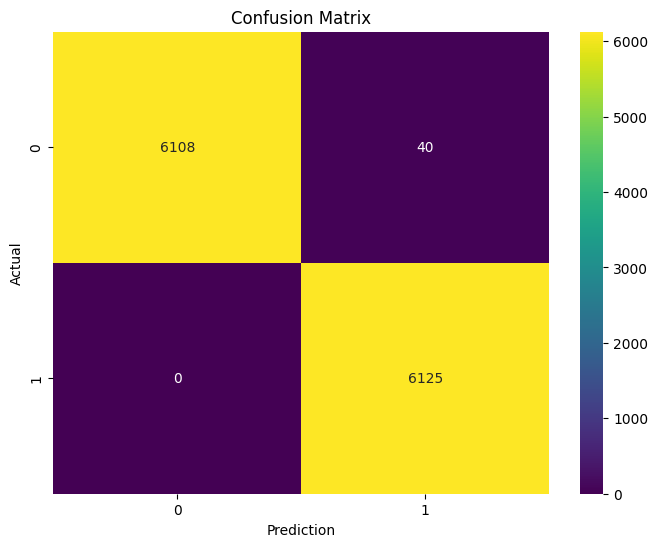

In [128]:
matrix = metrics.confusion_matrix(y_test, y_pred)
print(matrix)

#heatmap matrix
plt.figure(figsize = (8,6))
sns.heatmap(matrix, annot = True, fmt = ".0f", cmap = 'viridis')
plt.title("Confusion Matrix")
plt.xlabel("Prediction")
plt.ylabel("Actual")
plt.show()

In [129]:
report = metrics.classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      6148
           1       0.99      1.00      1.00      6125

    accuracy                           1.00     12273
   macro avg       1.00      1.00      1.00     12273
weighted avg       1.00      1.00      1.00     12273



In [130]:
#classification report
report = metrics.classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      6148
           1       0.99      1.00      1.00      6125

    accuracy                           1.00     12273
   macro avg       1.00      1.00      1.00     12273
weighted avg       1.00      1.00      1.00     12273



In [131]:
feature = pd.Series(rf.feature_importances_, index = X_train.columns).sort_values(ascending = False)
print(feature)

avg_glucose_level    0.386636
bmi                  0.306629
work_type            0.058488
hypertension         0.054529
age                  0.050998
heart_disease        0.035794
ever_married         0.033184
Residence_type       0.032558
smoking_status       0.032387
sex                  0.008797
dtype: float64


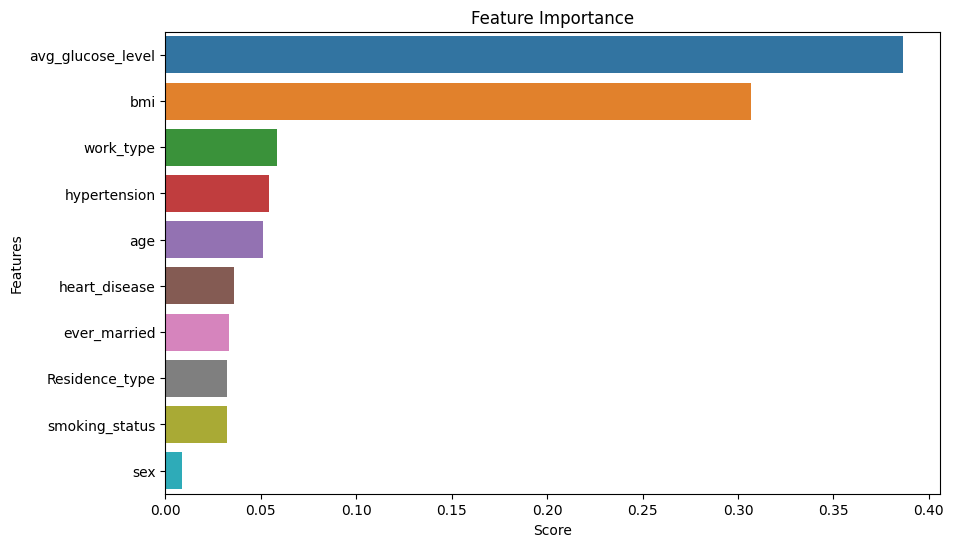

In [132]:
plt.figure(figsize = (10,6))
sns.barplot(x = feature, y = feature.index)
plt.title("Feature Importance")
plt.xlabel('Score')
plt.ylabel('Features')
plt.show()

In [133]:
X = stroke.drop('hypertension', axis = 1)
y = stroke['hypertension']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(28634, 10)
(28634,)
(12273, 10)
(12273,)


In [134]:
%time rf.fit(X_train, y_train)
rf.score(X_test, y_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


CPU times: total: 1.83 s
Wall time: 1.8 s


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished


0.9841929438605068

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished


[1 0 0 ... 1 0 0]
[[9610    4]
 [ 190 2469]]


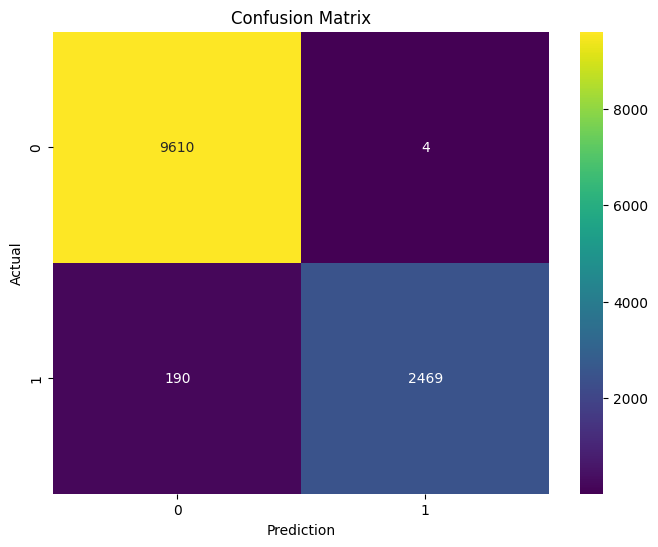

In [135]:
y_pred = rf.predict(X_test)
print(y_pred)
matrix = metrics.confusion_matrix(y_test, y_pred)
print(matrix)

#heatmap matrix
plt.figure(figsize = (8,6))
sns.heatmap(matrix, annot = True, fmt = ".0f", cmap = 'viridis')
plt.title("Confusion Matrix")
plt.xlabel("Prediction")
plt.ylabel("Actual")
plt.show()

In [136]:
report = metrics.classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      9614
           1       1.00      0.93      0.96      2659

    accuracy                           0.98     12273
   macro avg       0.99      0.96      0.98     12273
weighted avg       0.98      0.98      0.98     12273



avg_glucose_level    0.394671
bmi                  0.302742
stroke               0.064909
work_type            0.054166
age                  0.050731
smoking_status       0.036337
Residence_type       0.035659
ever_married         0.028576
heart_disease        0.026200
sex                  0.006008
dtype: float64


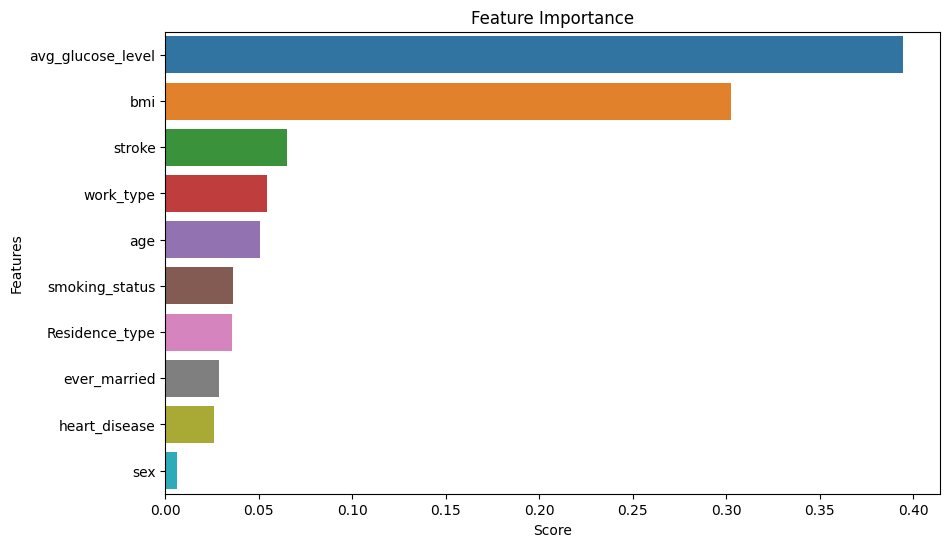

In [137]:
feature = pd.Series(rf.feature_importances_, index = X_train.columns).sort_values(ascending = False)
print(feature)
plt.figure(figsize = (10,6))
sns.barplot(x = feature, y = feature.index)
plt.title("Feature Importance")
plt.xlabel('Score')
plt.ylabel('Features')
plt.show()

Run the Random Forest Model again with the hypertension data

In [138]:
X_h = hypertension.drop('target', axis = 1)
y_h = hypertension['target']
X_train, X_test, y_train, y_test = train_test_split(X_h, y_h, test_size = 0.3, random_state = 0)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(18240, 13)
(18240,)
(7818, 13)
(7818,)


In [139]:
%time rf.fit(X_train, y_train)
rf.score(X_test, y_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


CPU times: total: 641 ms
Wall time: 645 ms


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


1.0

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


[0 1 1 ... 0 1 1]
[[3534    0]
 [   0 4284]]


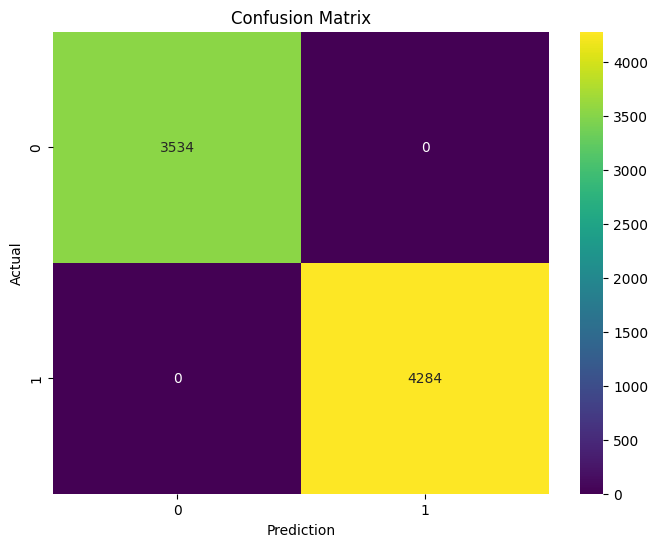

In [140]:
y_pred = rf.predict(X_test)
print(y_pred)
matrix = metrics.confusion_matrix(y_test, y_pred)
print(matrix)

#heatmap matrix
plt.figure(figsize = (8,6))
sns.heatmap(matrix, annot = True, fmt = ".0f", cmap = 'viridis')
plt.title("Confusion Matrix")
plt.xlabel("Prediction")
plt.ylabel("Actual")
plt.show()

In [141]:
report = metrics.classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3534
           1       1.00      1.00      1.00      4284

    accuracy                           1.00      7818
   macro avg       1.00      1.00      1.00      7818
weighted avg       1.00      1.00      1.00      7818



cp          0.147959
thalach     0.137146
thal        0.129018
ca          0.122665
oldpeak     0.116987
chol        0.109132
trestbps    0.086813
slope       0.056894
exang       0.052163
restecg     0.027743
fbs         0.011894
age         0.001440
sex         0.000146
dtype: float64


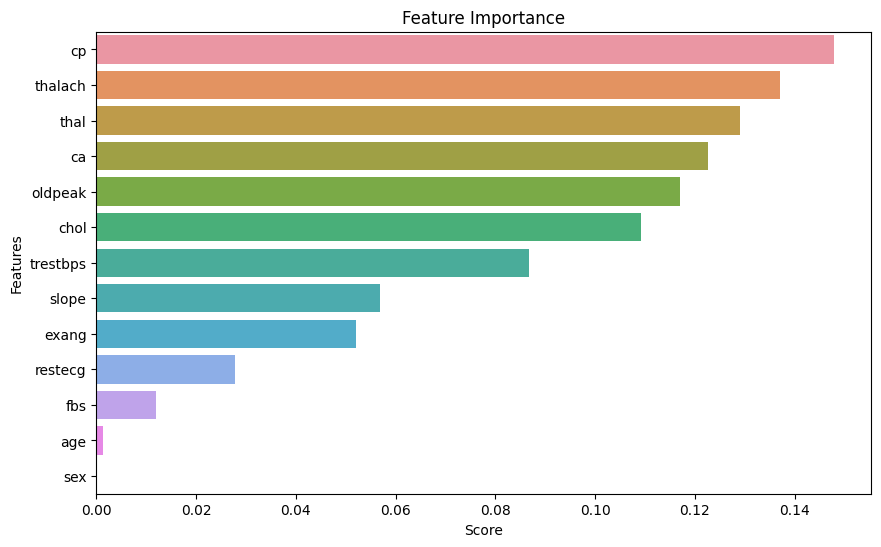

In [142]:
feature = pd.Series(rf.feature_importances_, index = X_train.columns).sort_values(ascending = False)
print(feature)
plt.figure(figsize = (10,6))
sns.barplot(x = feature, y = feature.index)
plt.title("Feature Importance")
plt.xlabel('Score')
plt.ylabel('Features')
plt.show()

### KBest Model

In [146]:
np.random.seed(None)
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
# from sklearn.feature_selection import f_classif
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score


KBest Model with 8 features

In [148]:


kbest=SelectKBest(mutual_info_classif, k=8)
pipe=Pipeline(steps=[('kbest',kbest),('RF',rf)])
scores=cross_val_score(pipe,X_train,y_train,cv=5,scoring='accuracy')
scores.mean()

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

1.0

KBest Model with 3 features

In [149]:
# KBest with 3 features
kbest=SelectKBest(mutual_info_classif, k=3)
pipe=Pipeline(steps=[('kbest',kbest),('RF',rf)])
scores=cross_val_score(pipe, X_train, y_train, cv=5, scoring='accuracy')
scores.mean()

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

0.9962171052631579

## Visualization

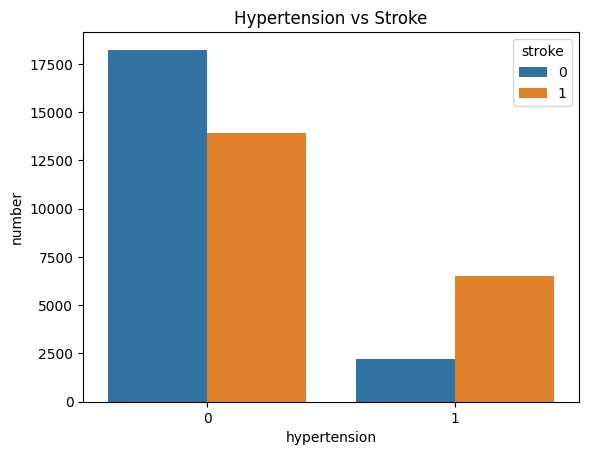

In [145]:
new = stroke.groupby(["stroke", "hypertension"]).size().reset_index(name="number")
sns.barplot(data=new, x="hypertension", y="number", hue="stroke")
plt.title("Hypertension vs Stroke")
plt.show()

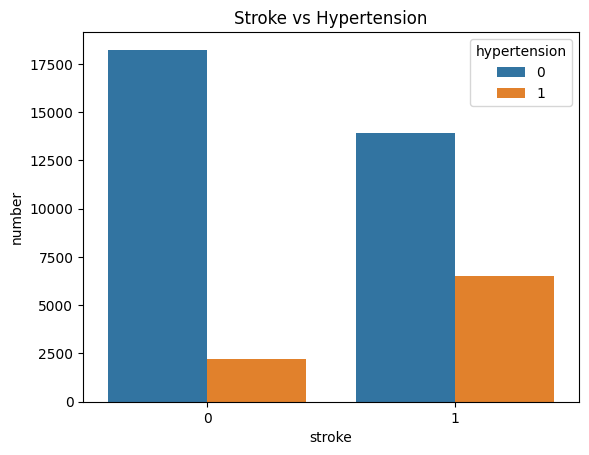

In [65]:
new = stroke.groupby(["stroke", "hypertension"]).size().reset_index(name="number")
sns.barplot(data=new, x="stroke", y="number", hue="hypertension")
plt.title("Stroke vs Hypertension")
plt.show()

Work Type status : patient job type: 0 - Never_worked, 1 - children, 2 - Govt_job, 3 - Self-employed, 4 - Private

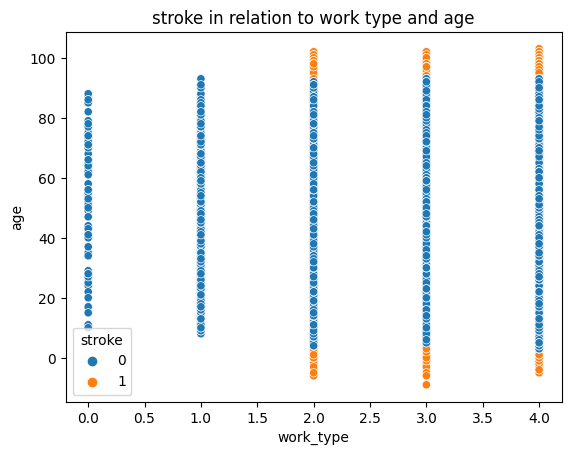

In [270]:
sns.scatterplot(x = "work_type", y = "age", hue = "stroke", data=stroke)
plt.title("stroke in relation to work type and age")
plt.show()

Classify stroke status on the basis of work type

In [233]:
counts = []
percs = []
for i in range(2,5):
    curr = stroke[stroke["work_type"] == float(i)]
    print("work", i, ":", len(curr))
    curr_str = curr[curr["stroke"] == 1]
    print("stroke", i, ":", len(curr_str))
    counts.append(len(curr_str))
    percs.append(len(curr_str)/len(curr))

work 2 : 5588
stroke 2 : 2512
work 3 : 9236
stroke 3 : 5578
work 4 : 25567
stroke 4 : 12370


[Text(0, 0, '2512'), Text(0, 0, '5578'), Text(0, 0, '12370')]

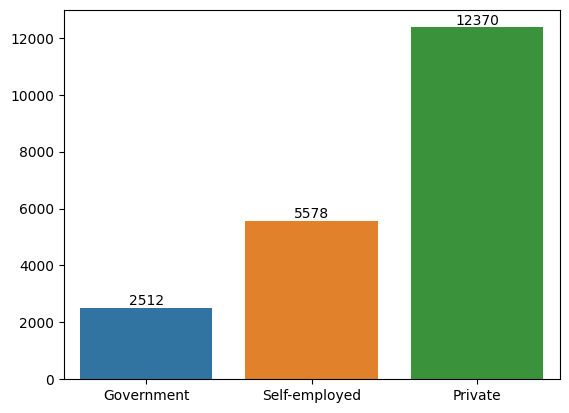

In [234]:
ax = sns.barplot(x = ['Government','Self-employed','Private'], y = counts)
ax.bar_label(ax.containers[0], label_type='edge')

work 2 : 5588
stroke 2 : 2512
work 3 : 9236
stroke 3 : 5578
work 4 : 25567
stroke 4 : 12370


[Text(0, 0, '0.45'), Text(0, 0, '0.60'), Text(0, 0, '0.48')]

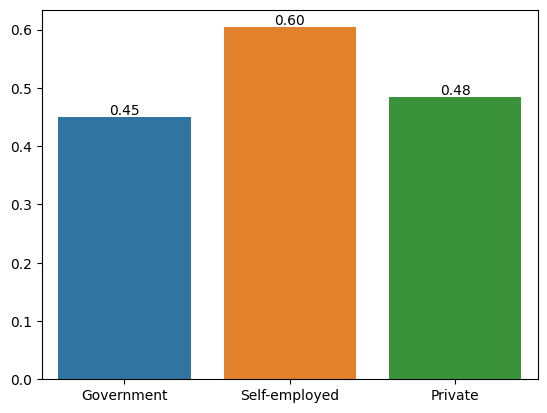

In [ ]:

ax = sns.barplot(x = ['Government','Self-employed','Private'], y = percs)
ax.bar_label(ax.containers[0], fmt='%.2f', label_type='edge')

In [235]:
counts = []
percs = []
for i in range(5):
    curr = stroke[(stroke["age"] < 20 * (i+1)) & (stroke["age"] > 0 + i*20)]
    print("age", i, ":", len(curr))
    curr_str = curr[curr["stroke"] == 1]
    print("stroke", i, ":", len(curr_str))
    counts.append(len(curr_str))
    percs.append(len(curr_str)/len(curr))

age 0 : 3147
stroke 0 : 1850
age 1 : 9231
stroke 1 : 4247
age 2 : 11960
stroke 2 : 5289
age 3 : 10534
stroke 3 : 5298
age 4 : 3862
stroke 4 : 2704


[Text(0, 0, '1850'),
 Text(0, 0, '4247'),
 Text(0, 0, '5289'),
 Text(0, 0, '5298'),
 Text(0, 0, '2704')]

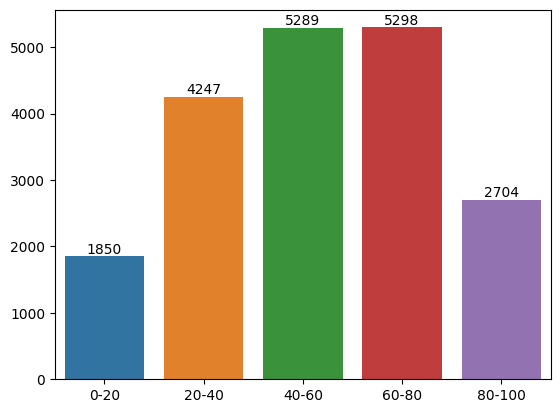

In [236]:
ax = sns.barplot(x = ['0-20','20-40','40-60','60-80','80-100'], y = counts)
ax.bar_label(ax.containers[0], label_type='edge')

[Text(0, 0, '0.587861'),
 Text(0, 0, '0.46008'),
 Text(0, 0, '0.442224'),
 Text(0, 0, '0.502943'),
 Text(0, 0, '0.700155')]

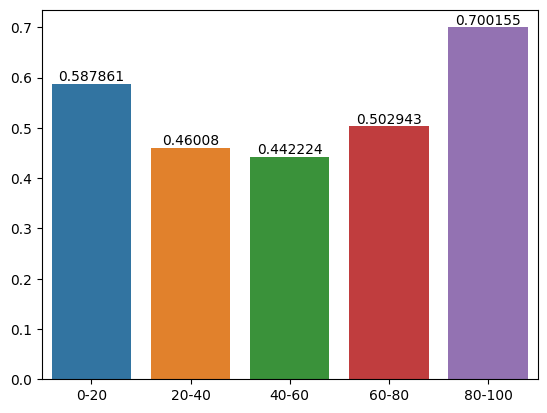

In [238]:
ax = sns.barplot(x = ['0-20','20-40','40-60','60-80','80-100'], y = percs)
ax.bar_label(ax.containers[0], label_type='edge')

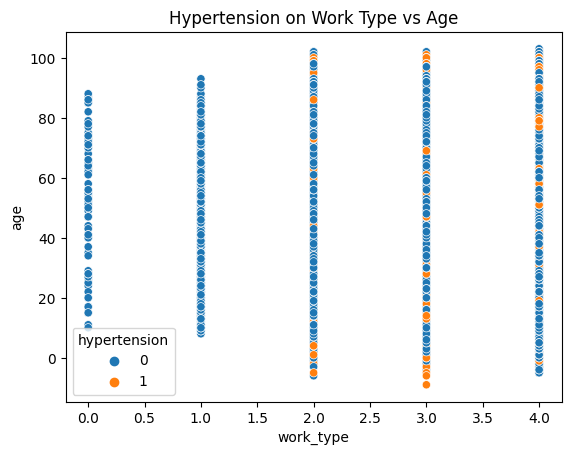

In [100]:
sns.scatterplot(x = "work_type", y = "age", hue = "hypertension", data=stroke)
plt.title("Hypertension on Work Type vs Age")
plt.show()

We can see no apparnet distribution of hypertension in relation between work type and age

<Axes: xlabel='bmi', ylabel='avg_glucose_level'>

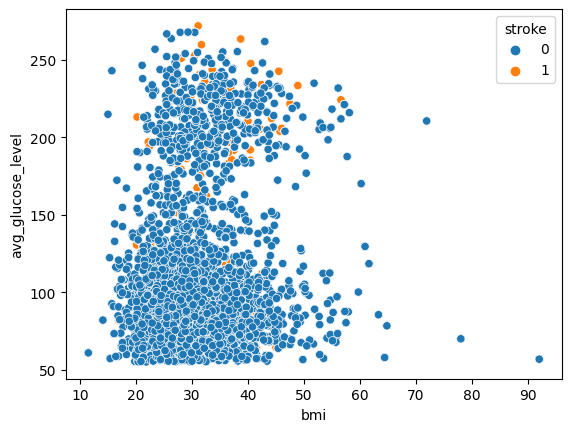

In [104]:
sns.scatterplot(x = "bmi", y = "avg_glucose_level", hue = "stroke", data=stroke)


### Glucose level in relation between Hypertension and Stroke
Calculate Average glucose level for stroke dataset

avg_glc_stroke: 137.3517771260997
avg_glc_stroke: 106.79787059226291


Text(0.5, 1.0, 'avg_glucose_level in stroke dataset')

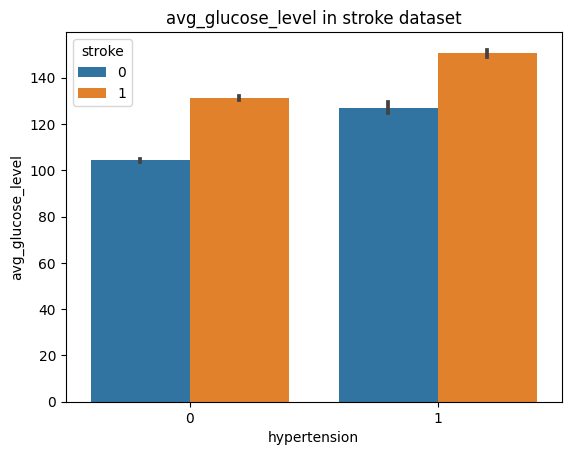

In [224]:
avg_glc_stroke = stroke[stroke["stroke"] == 1]["avg_glucose_level"]
print("avg_glc_stroke:", avg_glc_stroke.mean())
avg_glc_stroke = stroke[stroke["stroke"] == 0]["avg_glucose_level"]
print("avg_glc_stroke:", avg_glc_stroke.mean())

ax = sns.barplot(x = "hypertension", y = "avg_glucose_level", hue="stroke", data=stroke)
ax.set_title("avg_glucose_level in stroke dataset")

avg_bmi_stroke: 30.531583577712606
avg_bmi_stroke: 30.28106601466993


<Axes: xlabel='stroke', ylabel='bmi'>

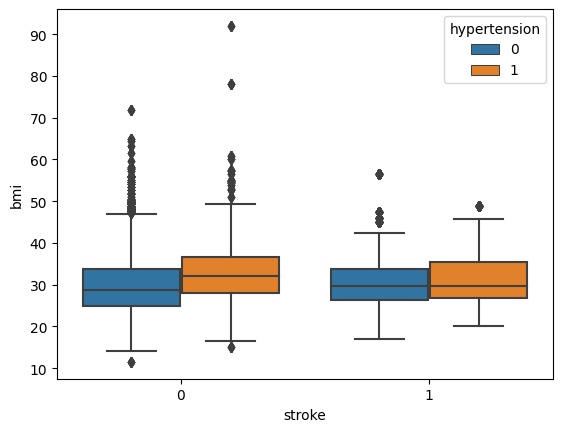

In [112]:
avg_bmi_stroke = stroke[stroke["stroke"] == 1]["bmi"]
print("avg_bmi_stroke:", avg_bmi_stroke.mean())
avg_bmi_stroke = stroke[stroke["stroke"] == 0]["bmi"]
print("avg_bmi_stroke:", avg_bmi_stroke.mean())

sns.boxplot(x = "stroke", y = "bmi", hue="hypertension", data=stroke)

Text(0.5, 1.0, 'Fasting Blood Sugar(Glucose) in Hypertension Dataset')

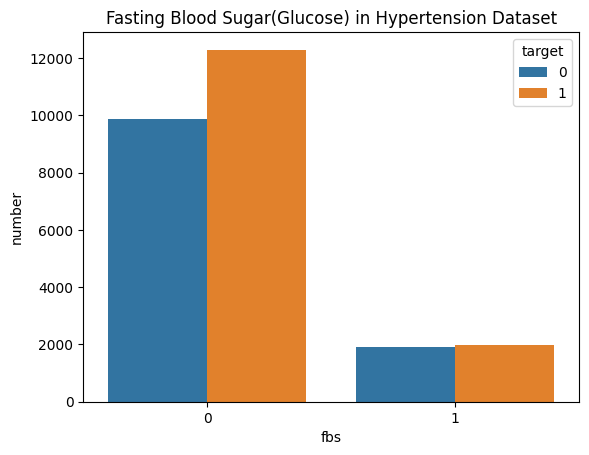

In [ ]:
new = hypertension.groupby(["target", "fbs"]).size().reset_index(name="number")
ax = sns.barplot(data=new, x="fbs", y="number", hue="target")
ax.set_title("Fasting Blood Sugar(Glucose) in Hypertension Dataset")

### Data Extraction
Try to connect hypertension and stroke data via glucose level column. However, the hypertension dataset only has a boolean value for glucose level(greater than 120), while the stroke dataset has the actual glucose level. Therefore, we can only extract the data from the stroke dataset.

Group stroke csv by tuple (age, sex)

In [193]:
stroke_dict = {}
for age in range(stroke["age"].astype("Int64").min(), stroke["age"].astype("int64").max()):
    curr = stroke[stroke["age"] == age]
    for sex in range (2):
        
        curr_w = curr[curr["sex"] == sex]
        if len(curr_w) != 0:
            stroke_dict[(age, sex)] = curr_w
stroke_dict = {k: v for k, v in stroke_dict.items() if len(v) != 0 and k[0] > 0}
print(stroke_dict.keys())
print(len(stroke_dict))

dict_keys([(1, 0), (1, 1), (2, 0), (2, 1), (3, 0), (3, 1), (4, 0), (4, 1), (5, 0), (5, 1), (6, 0), (6, 1), (7, 0), (7, 1), (8, 0), (8, 1), (9, 0), (9, 1), (10, 0), (10, 1), (11, 0), (11, 1), (12, 0), (12, 1), (13, 0), (13, 1), (14, 0), (14, 1), (15, 0), (15, 1), (16, 0), (16, 1), (17, 0), (17, 1), (18, 0), (18, 1), (19, 0), (19, 1), (20, 0), (20, 1), (21, 0), (21, 1), (22, 0), (22, 1), (23, 0), (23, 1), (24, 0), (24, 1), (25, 0), (25, 1), (26, 0), (26, 1), (27, 0), (27, 1), (28, 0), (28, 1), (29, 0), (29, 1), (30, 0), (30, 1), (31, 0), (31, 1), (32, 0), (32, 1), (33, 0), (33, 1), (34, 0), (34, 1), (35, 0), (35, 1), (36, 0), (36, 1), (37, 0), (37, 1), (38, 0), (38, 1), (39, 0), (39, 1), (40, 0), (40, 1), (41, 0), (41, 1), (42, 0), (42, 1), (43, 0), (43, 1), (44, 0), (44, 1), (45, 0), (45, 1), (46, 0), (46, 1), (47, 0), (47, 1), (48, 0), (48, 1), (49, 0), (49, 1), (50, 0), (50, 1), (51, 0), (51, 1), (52, 0), (52, 1), (53, 0), (53, 1), (54, 0), (54, 1), (55, 0), (55, 1), (56, 0), (56, 1),

Group hypertension by tuple (age, sex)

In [198]:
hypertension_dict = {}
for age in range(hypertension["age"].astype("Int64").min(), hypertension["age"].astype("int64").max()):
    curr = hypertension[hypertension["age"] == age]
    # print(len(curr[curr["sex"] == 1]))
    for sex in range (2):
        curr_w = curr[curr["sex"] == sex]
        if len(curr_w) != 0:
            hypertension_dict[(age, sex)] = curr_w  
        # print(sex)
hypertension_dict = {k: v for k, v in hypertension_dict.items() if len(v) != 0 and k[0] > 0} 
print(hypertension_dict.keys())
print(hypertension_dict[(12, 1)].shape)

dict_keys([(11, 1), (12, 1), (13, 1), (14, 0), (14, 1), (15, 0), (15, 1), (16, 0), (16, 1), (17, 0), (17, 1), (18, 0), (18, 1), (19, 0), (19, 1), (20, 0), (20, 1), (21, 0), (21, 1), (22, 0), (22, 1), (23, 0), (23, 1), (24, 0), (24, 1), (25, 0), (25, 1), (26, 0), (26, 1), (27, 0), (27, 1), (28, 0), (28, 1), (29, 0), (29, 1), (30, 0), (30, 1), (31, 0), (31, 1), (32, 0), (32, 1), (33, 0), (33, 1), (34, 0), (34, 1), (35, 0), (35, 1), (36, 0), (36, 1), (37, 0), (37, 1), (38, 0), (38, 1), (39, 0), (39, 1), (40, 0), (40, 1), (41, 0), (41, 1), (42, 0), (42, 1), (43, 0), (43, 1), (44, 0), (44, 1), (45, 0), (45, 1), (46, 0), (46, 1), (47, 0), (47, 1), (48, 0), (48, 1), (49, 0), (49, 1), (50, 0), (50, 1), (51, 0), (51, 1), (52, 0), (52, 1), (53, 0), (53, 1), (54, 0), (54, 1), (55, 0), (55, 1), (56, 0), (56, 1), (57, 0), (57, 1), (58, 0), (58, 1), (59, 0), (59, 1), (60, 0), (60, 1), (61, 0), (61, 1), (62, 0), (62, 1), (63, 0), (63, 1), (64, 0), (64, 1), (65, 0), (65, 1), (66, 0), (66, 1), (67, 0),

Show in the stroke dataset, how many people is considered to have high fasting blood sugar(glucose level > 120) and how many people is considered to have low fasting blood sugar(glucose level < 120)

<Axes: xlabel='fbs', ylabel='number'>

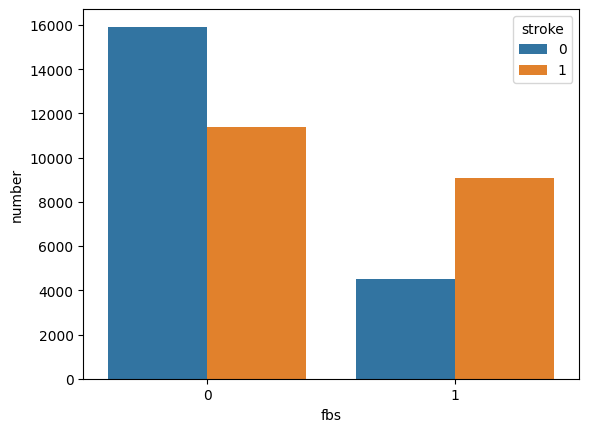

In [202]:
stroke_w = stroke.copy()
stroke_w["fbs"] = stroke_w["avg_glucose_level"].apply(lambda x: 1 if x > 120 else 0)
new = stroke_w.groupby(["stroke", "fbs"]).size().reset_index(name="number")
sns.barplot(x = "fbs", y = "number", hue="stroke", data=new)

<Axes: xlabel='fbs', ylabel='number'>

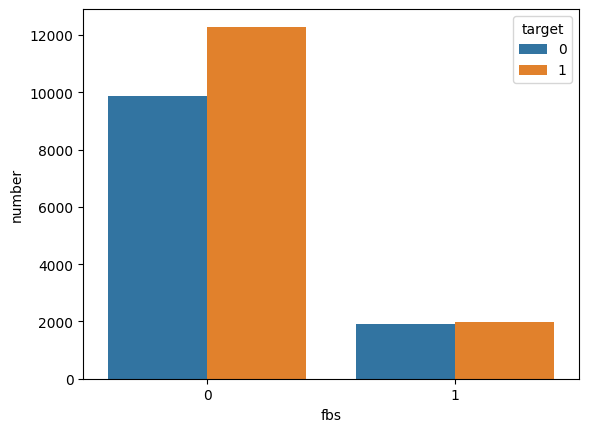

In [204]:
new = hypertension.groupby(["target", "fbs"]).size().reset_index(name="number")
sns.barplot(x = "fbs", y = "number", hue="target", data=new)

Text(0.5, 1.0, 'number of data points in both datasets')

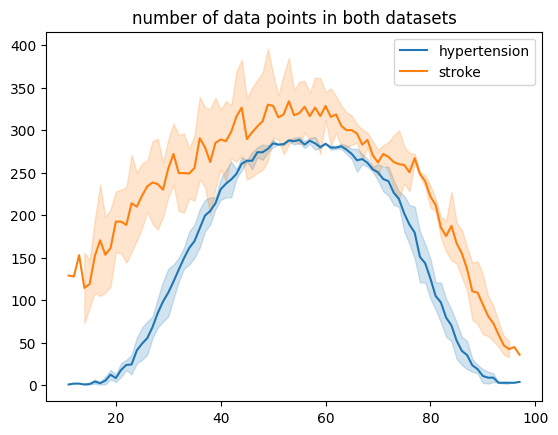

In [273]:
keys_list = []
hyp_data = []
str_data = []
for keys in sorted(hypertension_dict.keys() & stroke_dict.keys()):
    keys_list.append(keys[0])
    hyp_data.append(hypertension_dict[keys].shape[0])
    str_data.append(stroke_dict[keys].shape[0])
    # print(keys.shape)
    # print(hypertension_dict[keys].shape)
    # print(stroke_dict[keys].shape)
#     # print()
# print(len(keys_list))   
# print(len(hyp_data))
# print(len(str_data))
ax = sns.lineplot(x = keys_list, y = hyp_data, label = "hypertension")
ax = sns.lineplot(x = keys_list, y = str_data, label = "stroke")
ax.set_title("number of data points in both datasets")


In [266]:
# Input age and sex
key = (60, 1)
curr_set = stroke_dict[key]
strokes = curr_set[curr_set["stroke"] == 1]
strokes_w_hyp = strokes[strokes["hypertension"] == 1]
strokes_w_fbs = strokes[strokes["avg_glucose_level"] > 120]
targets = strokes[(strokes["hypertension"] == 1) & (strokes["avg_glucose_level"] > 120)]
percent = len(targets)/len(curr_set)
print("percent:", percent)

percent: 0.06956521739130435


([<matplotlib.patches.Wedge at 0x1c8669d8220>,
 [Text(0.9421006259932772, 0.5678436496986433, 'stroke and hypertension and high glucose'),
  Text(0.03728512439821485, 1.099367918168713, 'stroke and hypertension and low glucose'),
  Text(-1.0373888397104063, 0.36582016790261446, 'stroke and no hypertension and high glucose'),
  Text(0.25860259438104205, -1.069170097870023, 'stroke and no hypertension and low glucose')])

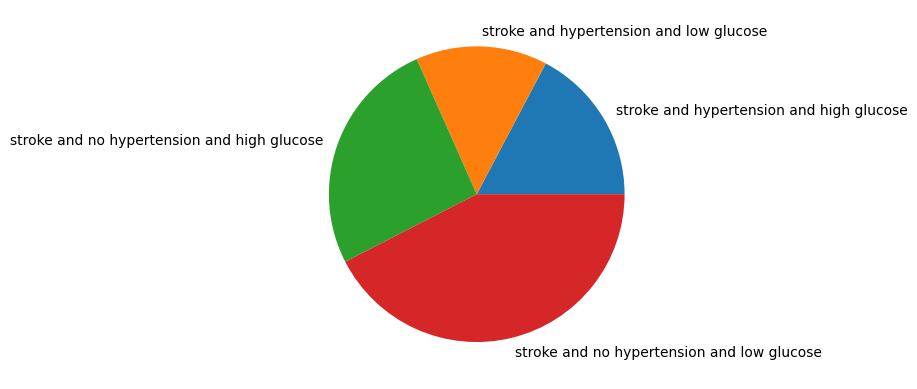

In [264]:
plt.pie([len(targets), len(strokes_w_hyp) - len(targets), len(strokes_w_fbs) - len(targets), len(strokes) - len(strokes_w_hyp) - len(strokes_w_fbs) + len(targets)], labels=["stroke and hypertension and high glucose", "stroke and hypertension and low glucose", "stroke and no hypertension and high glucose", "stroke and no hypertension and low glucose"])

In [256]:
print("percentile of people with high glucose", len(strokes_w_fbs)/len(strokes))

percentile of people with high glucose 0.3130434782608696


In [257]:
print("percentile of people with hypertension", len(strokes_w_hyp)/len(strokes))

percentile of people with hypertension 0.19710144927536233


In [261]:
print("possiblity of stroke given high glucose", len(targets)/len(strokes_w_fbs))

possiblity of stroke given high glucose 0.2222222222222222


In [262]:
print("possibility of stroke given hypertension", len(targets)/len(strokes_w_hyp))

possibility of stroke given hypertension 0.35294117647058826


In [260]:
print("possibility of stroke for that have both hypertension and high glucose", len(targets)/len(strokes))

percentile of people suffered stroke that have both hypertension and high glucose 0.06956521739130435


Text(0.5, 1.0, 'possiblity of a female having a stroke given hypertension and high glucose')

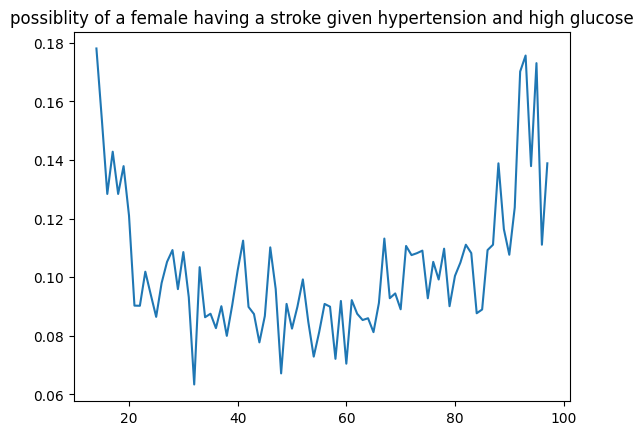

In [298]:
percs = [[], []]
ages = [[], []]
keys_list = sorted(hypertension_dict.keys() & stroke_dict.keys())
for key in keys_list:
    ages[key[1]].append(key[0])
    curr_set = stroke_dict[key]
    strokes = curr_set[(curr_set["stroke"] == 1) & (curr_set["hypertension"] == 1)]
    targets = strokes[(strokes["avg_glucose_level"] > 120)]
    percs[key[1]].append(len(targets)/len(curr_set))

ax = sns.lineplot(x= ages[0], y= percs[0])
ax.set_title("possiblity of a female having a stroke given hypertension and high glucose")


Text(0.5, 1.0, 'possiblity of a male having a stroke given hypertension and high glucose')

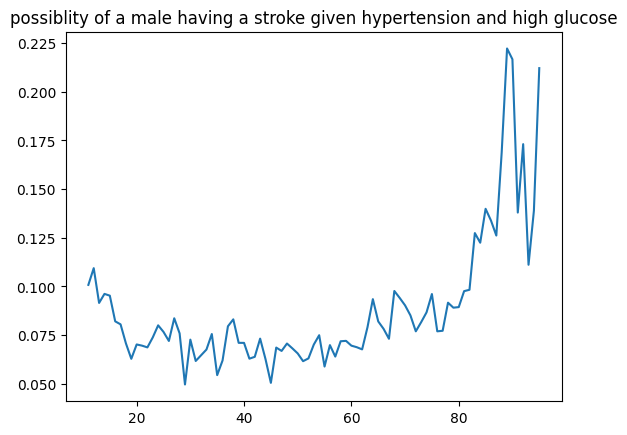

In [299]:

ax = sns.lineplot(x= ages[1], y= percs[1])
ax.set_title("possiblity of a male having a stroke given hypertension and high glucose")


In [296]:
percs = [[], []]
ages = [[], []]
keys_list = sorted(hypertension_dict.keys() & stroke_dict.keys())
for key in keys_list:
    ages[key[1]].append(key[0])
    curr_set = stroke_dict[key]
    strokes = curr_set[(curr_set["stroke"] == 1) & (curr_set["hypertension"] == 1)]
    targets = strokes[(strokes["avg_glucose_level"] < 120)]
    percs[key[1]].append(len(targets)/len(curr_set))


Text(0.5, 1.0, 'possiblity of a female having a stroke given hypertension and low glucose')

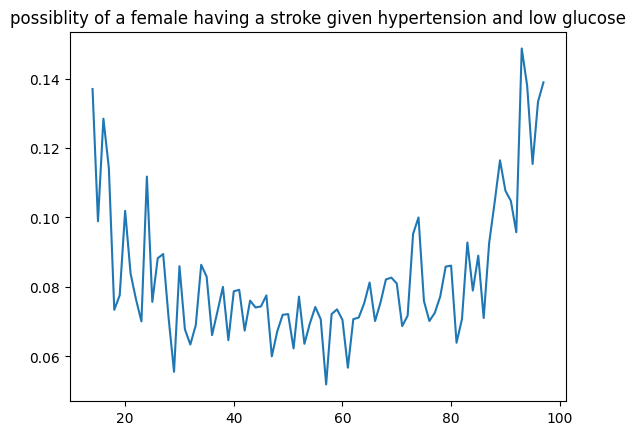

In [293]:
ax = sns.lineplot(x= ages[0], y= percs[0])
ax.set_title("possiblity of a female having a stroke given hypertension and low glucose")

Text(0.5, 1.0, 'possiblity of a male having a stroke given hypertension and low glucose')

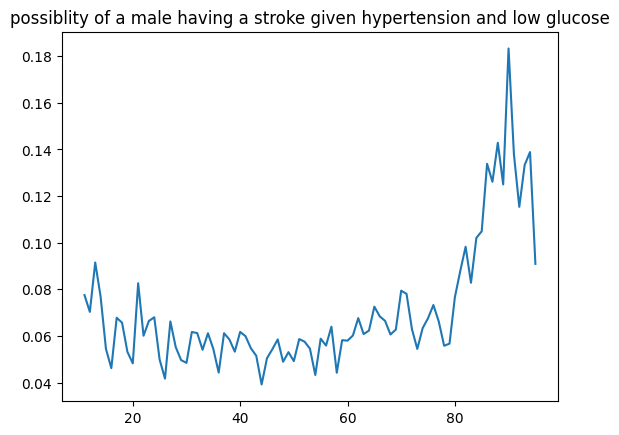

In [297]:
ax = sns.lineplot(x= ages[1], y= percs[1])
ax.set_title("possiblity of a male having a stroke given hypertension and low glucose")

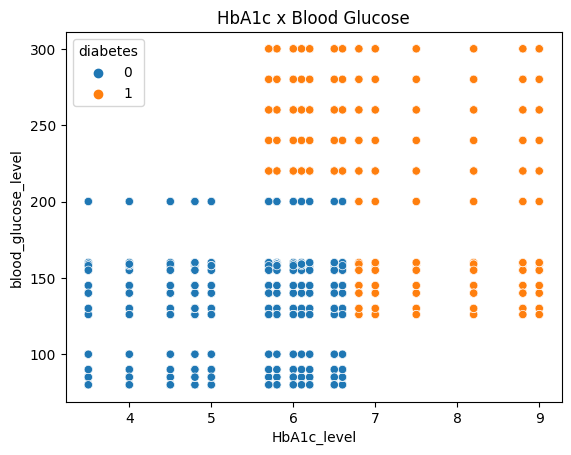

In [64]:
sns.scatterplot(x = "HbA1c_level", y = "blood_glucose_level", hue = "diabetes", data=df2)
plt.title("HbA1c x Blood Glucose")
plt.show()

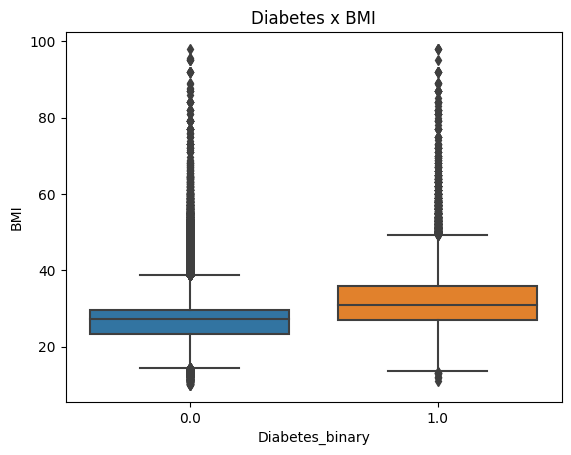

Average BMI of People Without Diabetes: 27.13315721425981
Standard Deviation of People Without Diabetes: 6.334541782853251
Average BMI of People With Diabetes: 31.9526125530265
Standard Deviation of People With Diabetes: 7.401532541622375


In [63]:
sns.boxplot(data=combined, x="Diabetes_binary", y="BMI")
plt.title("Diabetes x BMI")
plt.show()
wo = combined[combined["Diabetes_binary"] == 0]["BMI"]
w = combined[combined["Diabetes_binary"] == 1]["BMI"]

print("Average BMI of People Without Diabetes: " + str(statistics.mean(wo)))
print("Standard Deviation of People Without Diabetes: " + str(statistics.stdev(wo)))
print("Average BMI of People With Diabetes: " + str(statistics.mean(w)))
print("Standard Deviation of People With Diabetes: " + str(statistics.stdev(w)))

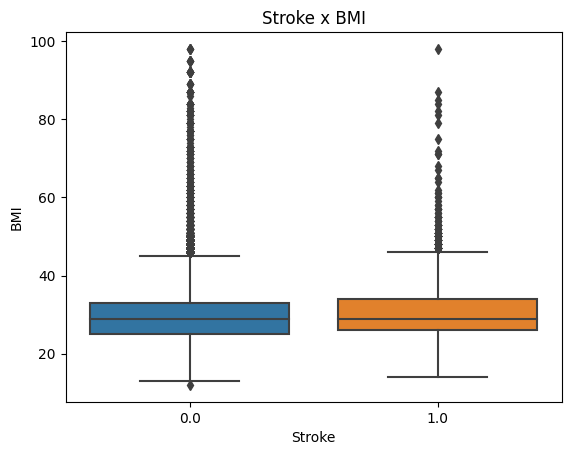

Average BMI of People Without a Stroke: 29.81498408676109
Standard Deviation of People Without a Stroke: 7.096584313010878
Average BMI of People With a Stroke: 30.4905574516496
Standard Deviation of People With a Stroke: 7.342743068513054


In [77]:
sns.boxplot(data=df, x="Stroke", y="BMI")
plt.title("Stroke x BMI")
plt.show()
wo = combined[combined["Stroke"] == 0]["BMI"]
w = combined[combined["Stroke"] == 1]["BMI"]

print("Average BMI of People Without a Stroke: " + str(statistics.mean(wo)))
print("Standard Deviation of People Without a Stroke: " + str(statistics.stdev(wo)))
print("Average BMI of People With a Stroke: " + str(statistics.mean(w)))
print("Standard Deviation of People With a Stroke: " + str(statistics.stdev(w)))

Correlation between Diabetes and Stroke: 0.1254267846851689


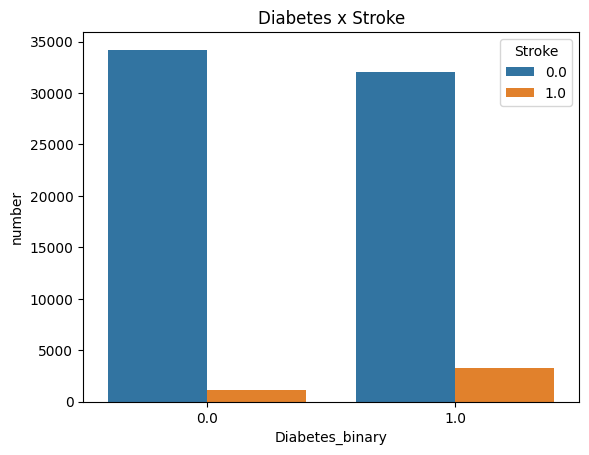

In [80]:
stroke = df.groupby(["Diabetes_binary", "Stroke"]).size().reset_index(name="number")
sns.barplot(data=stroke, x="Diabetes_binary", y="number", hue="Stroke")
plt.title("Diabetes x Stroke")
print("Correlation between Diabetes and Stroke: " + str(df["Diabetes_binary"].corr(df["Stroke"])))

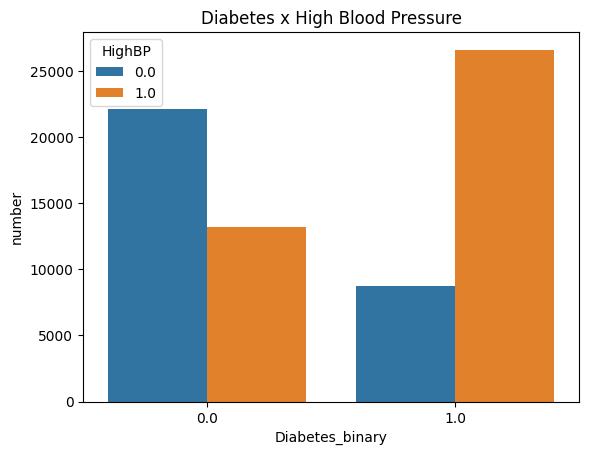

Correlation between Diabetes and High Blood Pressure: 0.38151554890730616


In [81]:
bp = df.groupby(["Diabetes_binary", "HighBP"]).size().reset_index(name="number")
sns.barplot(data=bp, x="Diabetes_binary", y="number", hue="HighBP")
plt.title("Diabetes x High Blood Pressure")
plt.show()
print("Correlation between Diabetes and High Blood Pressure: " + str(df["Diabetes_binary"].corr(df["HighBP"])))

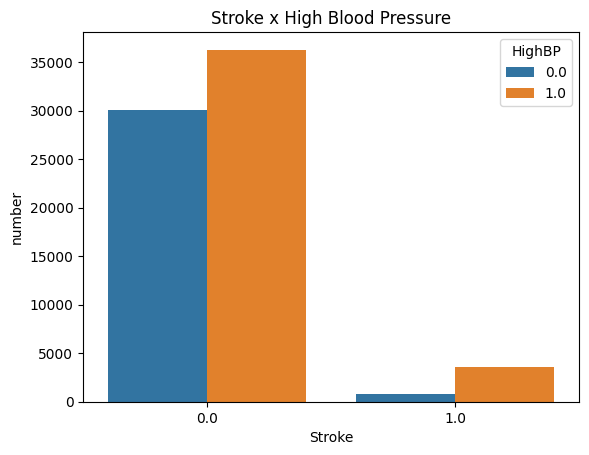

Correlation between Diabetes and High Blood Pressure: 0.12905987239828887


In [82]:
bp = df.groupby(["Stroke", "HighBP"]).size().reset_index(name="number")
sns.barplot(data=bp, x="Stroke", y="number", hue="HighBP")
plt.title("Stroke x High Blood Pressure")
plt.show()
print("Correlation between Diabetes and High Blood Pressure: " + str(df["Stroke"].corr(df["HighBP"])))

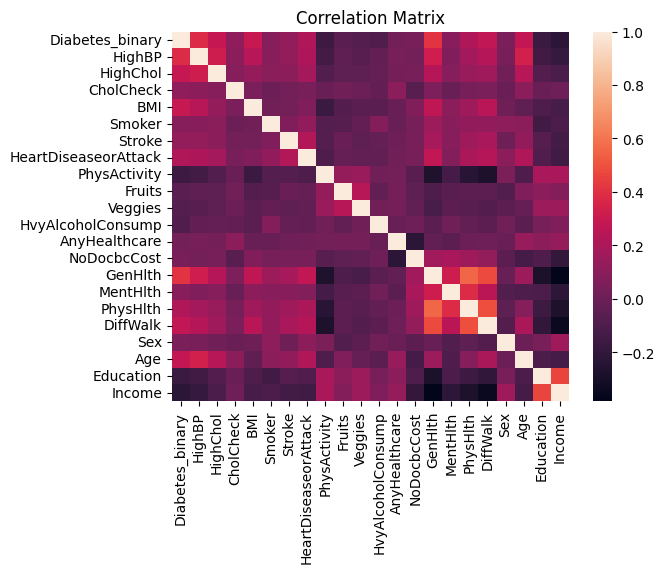

In [67]:
sns.heatmap(df.corr())
plt.title("Correlation Matrix")
plt.show()